<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Yerson Emel Gulloso Moyano  <br>
Fecha: 26/02/2023

# Importación de librerias necesarias

# Parte I. Regresión

In [379]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [380]:
#Código para cargar el Dataset
url = 'https://cdn.jsdelivr.net/gh/Emelgm/tecnicas_ia/data/raw/mobiles.csv'

dataset = pd.read_csv(url)
dataset.tail(5)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


Verificar las dimensiones del dataset:

In [381]:
dataset.shape

(2000, 21)

Verificar si existen valores nulos:

In [382]:
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Descripción de la fuente del Dataset

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


Tipo de datos de las variables del dataset:

In [383]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [384]:
print(f'Número total de instancias: {dataset.shape[0]}')

print(f'Número de atributos de entrada: {dataset.shape[1]}')

Número total de instancias: 2000
Número de atributos de entrada: 21


Estadísticas de la variable objetivo:

In [385]:
dataset['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

Estadística de variables relacionadas con la objetivo:

In [386]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Rango de precio de acuerdo a la capacidad de memoria interna

<AxesSubplot: xlabel='price_range', ylabel='int_memory'>

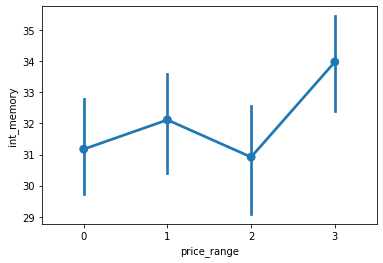

In [387]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

Rango de precio de acuerdo con el rendimiento de la batería

<AxesSubplot: xlabel='price_range', ylabel='battery_power'>

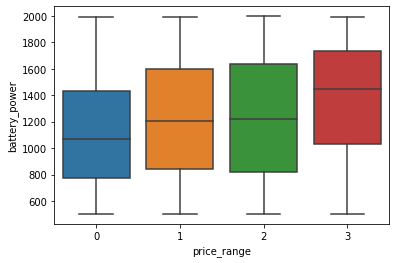

In [388]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

Selección de variables para el entrenamiento y su cambio de tipo de dato

In [389]:
data = dataset[['battery_power','blue','clock_speed','dual_sim','n_cores','ram','wifi','price_range']]
data = data.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   n_cores        2000 non-null   float64
 5   ram            2000 non-null   float64
 6   wifi           2000 non-null   float64
 7   price_range    2000 non-null   float64
dtypes: float64(8)
memory usage: 125.1 KB


Selección de las variables de entrada y variable objetivo:

In [390]:
X = data.drop('price_range', axis=1)
y = data["price_range"]

## División del dataset en datos de entrenamiento y datos de test 

Separación de 80% entrenamiento y 20% de test:

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

## Propuesta de arquitectura de red neuronal

Describe: 

+ las neuronas en la capa de entrada 
+ las capas intermedias – al menos dos – 
+ capa de salida
+ funciones de activación

Estructura de la red neuronal:

In [392]:
# Código de la estructuración de la red
capa_in = tf.keras.layers.Dense(units=1,input_shape=[7])
capa_2 = tf.keras.layers.Dense(units=20, activation="relu")
capa_3 = tf.keras.layers.Dense(units=20, activation="relu")
capa_out = tf.keras.layers.Dense(1, activation="softmax")
model = tf.keras.Sequential([
    capa_in,
    capa_2,
    capa_3,
    capa_out
])

Inspección del modelo:

In [393]:
#Código de la inspección del modelo de red
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 1)                 8         
                                                                 
 dense_57 (Dense)            (None, 20)                40        
                                                                 
 dense_58 (Dense)            (None, 20)                420       
                                                                 
 dense_59 (Dense)            (None, 1)                 21        
                                                                 
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________


##  Ajuste de modelo de Regresión RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

Ajuste óptimo de los pesos:

In [394]:
#Código de ajuste y entrenamiento
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

Entrenando el modelo:

In [395]:
train = model.fit(X_train,y_train, epochs=100, verbose=False)
print('El entrenamiento ha terminado')

El entrenamiento ha terminado


## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

In [396]:
hist = pd.DataFrame(train.history)
hist['epoch'] = train.epoch
hist.tail()

,loss,accuracy,epoch
95,-644153088.0,0.2525,95
96,-665769664.0,0.2525,96
97,-687782080.0,0.2525,97
98,-710480512.0,0.2525,98
99,-733586368.0,0.2525,99


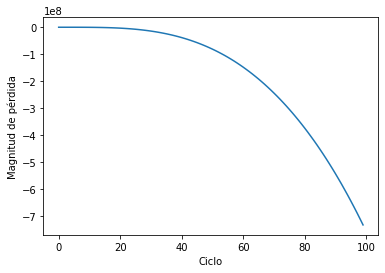

In [397]:
plt.xlabel("Ciclo")
plt.ylabel("Magnitud de pérdida")
plt.plot(train.history["loss"])

### Evalúe los resultados  para el conjunto de test.

In [398]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

13/13 - 0s - loss: -8.0722e+08 - accuracy: 0.2400 - 354ms/epoch - 27ms/step


## Ajuste de modelos de Regresión alternativos

Elige al menos un método de regresión no basado en redes neuronales (p.ej. regresión lineal, regresión polinómica, regresión logarítmica, SVR, random forest regression, etc.).

Modelo KNN

In [399]:
model_knn = KNeighborsClassifier()
model_knn_fit = model_knn.fit(X_train, y_train)

Modelo Support vector machine

In [400]:
model_svm = SVC()
model_svm_fit = model_svm.fit(X_train,y_train)

Precisión de modelos:

In [401]:
y_pred = model_knn_fit.predict(X_test)
print(f'Precisión KNN: {round(accuracy_score(y_test,y_pred)*100,4)}%')

y_pred_2 = model_svm_fit.predict(X_test)
print(f'Precisión SVR: {round(accuracy_score(y_test,y_pred_2)*100,4)}%')


Precisión KNN: 76.5%
Precisión SVR: 78.25%


Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

Gráfico de performance

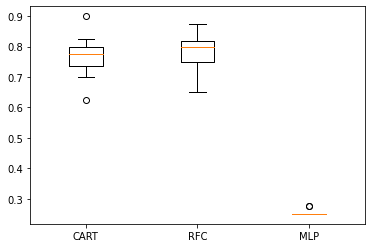

In [402]:
modelos = []
modelos.append(('CART', KNeighborsClassifier()))
modelos.append(('RFC', SVC()))
modelos.append(('MLP', MLPClassifier(activation='relu', alpha=1e-05,batch_size='auto',beta_1=0.9,beta_2=0.999,early_stopping=False,epsilon=1e-08,hidden_layer_sizes=(3,3),learning_rate='constant',learning_rate_init=0.001,max_iter=200,momentum=0.9,nesterovs_momentum=True,power_t=0.5,random_state=1,shuffle=True,solver='lbfgs',tol=0.0001,validation_fraction=0.1,verbose=False,warm_start=False)))
results = []
names = []

for i, model in modelos:
    kfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True)
    cv_results = cross_val_score(model,X_test,y_test,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(i)

plt.boxplot(results, labels=names);

Construya un párrafo con los principales hallazgos.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: 
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. 
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.